--- Dataset: Moons (DBSCAN excels) ---


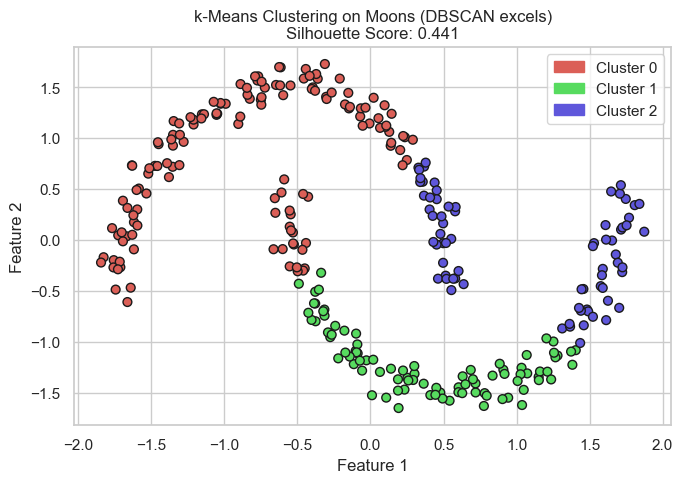

k-Means Silhouette Score: 0.441


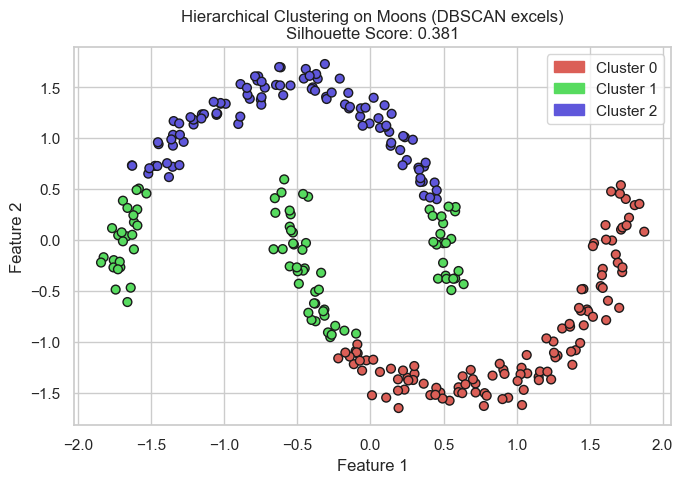

Hierarchical Silhouette Score: 0.381


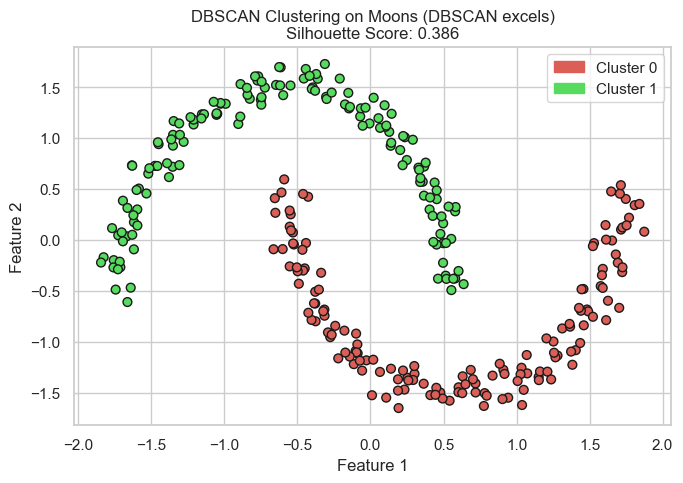

DBSCAN Silhouette Score: 0.386

--- Dataset: Blobs with varying density (DBSCAN struggles) ---


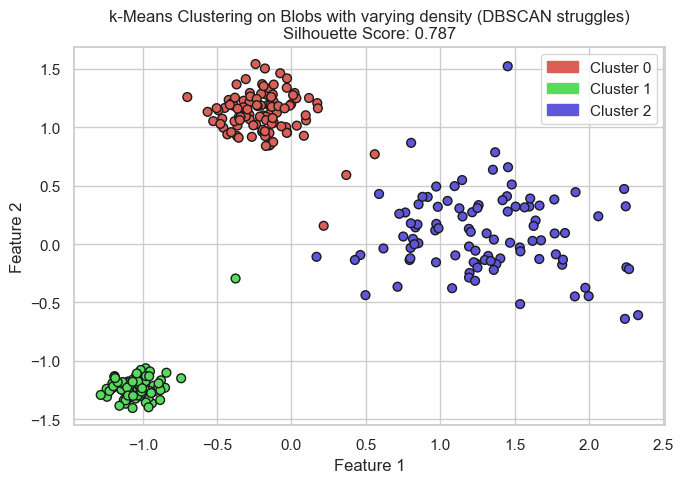

k-Means Silhouette Score: 0.787


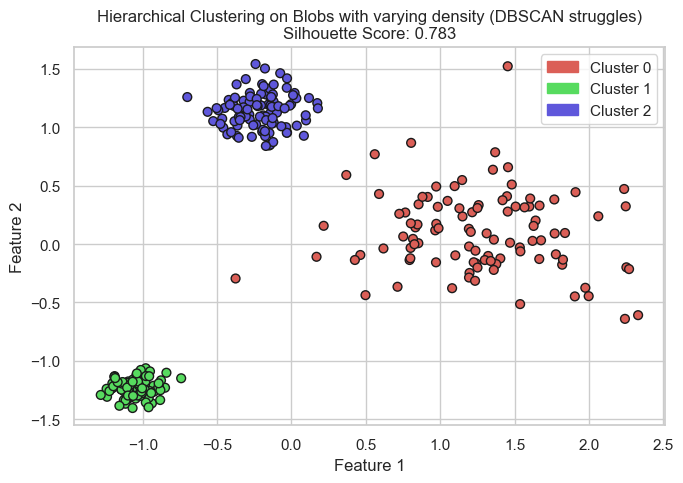

Hierarchical Silhouette Score: 0.783


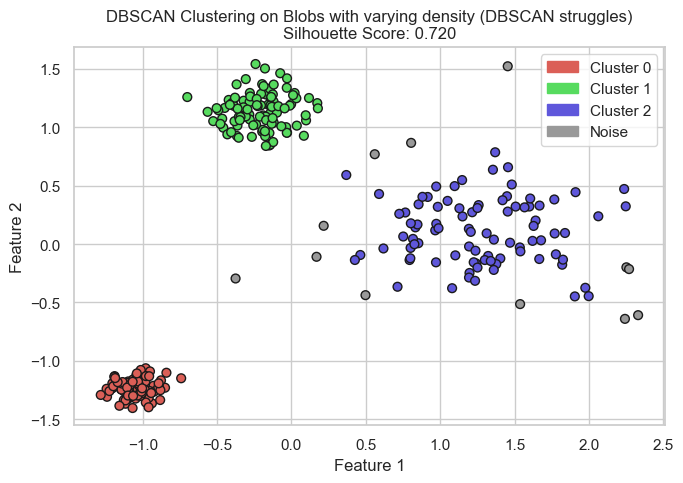

DBSCAN Silhouette Score: 0.720



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Setup plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (7, 5)

# Helper function for plotting clusters with legend and silhouette score
def plot_clusters(X, labels, title):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    palette = sns.color_palette("hls", n_colors=max(n_clusters, 3))
    colors = [palette[label % len(palette)] if label != -1 else (0.6, 0.6, 0.6) for label in labels]

    plt.scatter(X[:, 0], X[:, 1], c=colors, s=40, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Create legend handles
    from matplotlib.patches import Patch
    handles = [Patch(color=palette[i], label=f'Cluster {i}') for i in range(n_clusters)]
    if -1 in labels:
        handles.append(Patch(color=(0.6, 0.6, 0.6), label='Noise'))
    plt.legend(handles=handles)
    plt.tight_layout()
    plt.show()

# Prepare datasets
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Scale datasets
X_moons = StandardScaler().fit_transform(X_moons)
X_blobs = StandardScaler().fit_transform(X_blobs)

datasets = {
    "Moons (DBSCAN excels)": X_moons,
    "Blobs with varying density (DBSCAN struggles)": X_blobs
}

# Define clustering models with suitable parameters
models = {
    "k-Means": lambda X: KMeans(n_clusters=3, random_state=42).fit_predict(X),
    "Hierarchical": lambda X: AgglomerativeClustering(n_clusters=3).fit_predict(X),
    "DBSCAN": lambda X: DBSCAN(eps=0.3, min_samples=5).fit_predict(X)  # eps tuned for moons, may vary
}

# Run clustering and plot
for dataset_name, X in datasets.items():
    print(f"--- Dataset: {dataset_name} ---")
    for model_name, cluster_func in models.items():
        labels = cluster_func(X)

        # Calculate silhouette score only if valid
        unique_labels = set(labels)
        if len(unique_labels) > 1 and (len(unique_labels) != 2 or -1 not in unique_labels):
            score = silhouette_score(X, labels)
            score_text = f"{score:.3f}"
        else:
            score_text = "N/A"

        title = f"{model_name} Clustering on {dataset_name}\nSilhouette Score: {score_text}"
        plot_clusters(X, labels, title)
        print(f"{model_name} Silhouette Score: {score_text}")
    print()
